In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from preprocessing import *

In [2]:
# Loading Data
data_raw = pd.read_csv('/Users/JasonLebov_1/Desktop/CS 470/Final Project/mxmh_survey_results.csv')

In [3]:
# Step 1: Dropping Features/Samples
    # Features
cols_drop = ['Permissions', 'Music effects', 'Timestamp', 'BPM']
drop_features = drop_irreleveant(data_raw, cols_drop)

    # Samples --> w/ NaN
drop_samples = drop_features.dropna()

In [4]:
# Step 2: Convert Mental Illness Scores to Categorical
features_range = ['Anxiety', 'Depression', 'OCD', 'Insomnia']
data_ranged = convert_ranges(drop_samples, features_range)

/Users/JasonLebov_1/Desktop/CS 470/Final Project/CS470_FinalProject_Code/preprocessing.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[feature] = pd.cut(df[feature],
/Users/JasonLebov_1/Desktop/CS 470/Final Project/CS470_FinalProject_Code/preprocessing.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[feature] = pd.cut(df[feature],
/Users/JasonLebov_1/Desktop/CS 470/Final Project/CS470_FinalProject_Code/preprocessing.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a sl

In [5]:
# Step 3: One Hot Encode Features
cols_dummy = ["Primary streaming service", "Fav genre"]
one_hot_df = one_hot_encode(data_ranged, cols_dummy)

In [6]:
# Step 4: Label Encoding Features
encode_features_binary = ["While working" , "Instrumentalist", "Composer", "Exploratory", "Foreign languages"]
binary_options = ['No', 'Yes']
label_encoded_df = label_encode(one_hot_df, encode_features_binary, binary_options)

In [7]:
# Step 4 [cont]: Label Encoding Features
encode_features_cat = ["Frequency [Classical]", "Frequency [Country]", "Frequency [EDM]", "Frequency [Folk]", 'Frequency [Gospel]', 
                   "Frequency [Hip hop]", "Frequency [Jazz]", "Frequency [K pop]", "Frequency [Latin]", "Frequency [Lofi]", "Frequency [Metal]", "Frequency [Pop]","Frequency [R&B]", "Frequency [Rap]",'Frequency [Rock]', 
                   'Frequency [Video game music]']
cat_options = ['Never', 'Rarely', 'Sometimes', 'Very frequently']
label_encoded_df_final = label_encode(label_encoded_df, encode_features_cat, cat_options)

In [8]:
# Move Label's to End of DF
cols = ['Anxiety', 'Depression', 'OCD', 'Insomnia']
numeric_df_final = label_end(label_encoded_df_final, cols)

In [9]:
# Step 5: Pearson Correlation Matrix - Features
cols_left_out = ['Anxiety', 'OCD', 'Insomnia', 'Depression']
feature_isolate = numeric_df_final.drop(columns=cols_left_out, axis=1)
feature_corr = pearson_matrix(feature_isolate)

In [10]:
# Step 5 [cont]: Dropping Highly Correlated Features --> Threshold (delta) = 0.5
delta_val = 0.5
corr_feature_drop = pearson_drop_delta(numeric_df_final, feature_corr, 0.5)

['Frequency [Hip hop]', 'Fav genre_Metal', 'Frequency [Rock]']


In [11]:
# Step 6: Creating 4 Datasets, for Each Illness
anxiety_df = corr_feature_drop.drop(columns=['Depression', 'OCD', 'Insomnia'], axis=1)
depression_df = corr_feature_drop.drop(columns=['Anxiety', 'OCD', 'Insomnia'], axis=1)
ocd_df = corr_feature_drop.drop(columns=['Anxiety', 'Depression', 'Insomnia'], axis=1)
insomnia_df = corr_feature_drop.drop(columns=['Anxiety', 'Depression', 'OCD'], axis=1)

In [12]:
# Step 6 [cont]: Removing 'Symptoms_' Prefix from Label Column
anxiety_df = remove_prefix(anxiety_df, 'Anxiety')
depression_df = remove_prefix(depression_df, 'Depression')
ocd_df = remove_prefix(ocd_df, 'OCD')
insomnia_df = remove_prefix(insomnia_df, 'Insomnia')

In [13]:
# Step 7: Label Encoding Label Feature
feature_options = ['Asymptomatic', 'Mild', 'Moderate', 'Severe']

anxiety_encoded = label_encode(anxiety_df, ['Anxiety'], feature_options)
depression_encoded = label_encode(depression_df, ['Depression'], feature_options)
ocd_encoded = label_encode(ocd_df, ['OCD'], feature_options)
insomnia_encoded = label_encode(insomnia_df, ['Insomnia'], feature_options)

In [14]:
# Step 8: Rerun of Pearson Correlation for Labels

anxiety_corr = pearson_matrix(anxiety_encoded)
depression_corr = pearson_matrix(depression_encoded)
ocd_corr = pearson_matrix(ocd_encoded)
insomnia_corr = pearson_matrix(insomnia_encoded)

In [15]:
# Step 8 [cont]: Dropping Highly Correlated Features to Label --> Threshold (gamma) = 0.01
anxiety_drop = pearson_drop_gamma(anxiety_encoded, anxiety_corr, 0.01)
depression_drop = pearson_drop_gamma(depression_encoded, depression_corr, 0.01)
ocd_drop = pearson_drop_gamma(ocd_encoded, ocd_corr, 0.01)
insomnia_drop = pearson_drop_gamma(insomnia_encoded, insomnia_corr, 0.01)

features_to_drop = set(anxiety_drop).intersection(depression_drop, ocd_drop, insomnia_drop)

['Fav genre_Video game music', 'Frequency [Jazz]', 'Frequency [Country]', 'Fav genre_Lofi']
['Fav genre_Jazz', 'Frequency [Classical]', 'Fav genre_Folk', 'Fav genre_Video game music', 'Frequency [K pop]']
['Fav genre_Country', 'Frequency [Classical]', 'Fav genre_R&B', 'Primary streaming service_Apple Music', 'Fav genre_Classical', 'Fav genre_Hip hop', 'Frequency [Metal]', 'Frequency [Gospel]', 'Frequency [Latin]']
['Primary streaming service_I do not use a streaming service.', 'Fav genre_Jazz', 'Fav genre_Classical', 'Fav genre_Folk', 'Frequency [K pop]']


In [16]:
features_to_drop

set()

In [ ]:
# Step 9: Create Train-Test-Splits of Data

In [10]:
# Step 10: Min-Max Scaling --> Only on Training Data


In [ ]:
# Step 11: Save Files to CSB

Visualizations

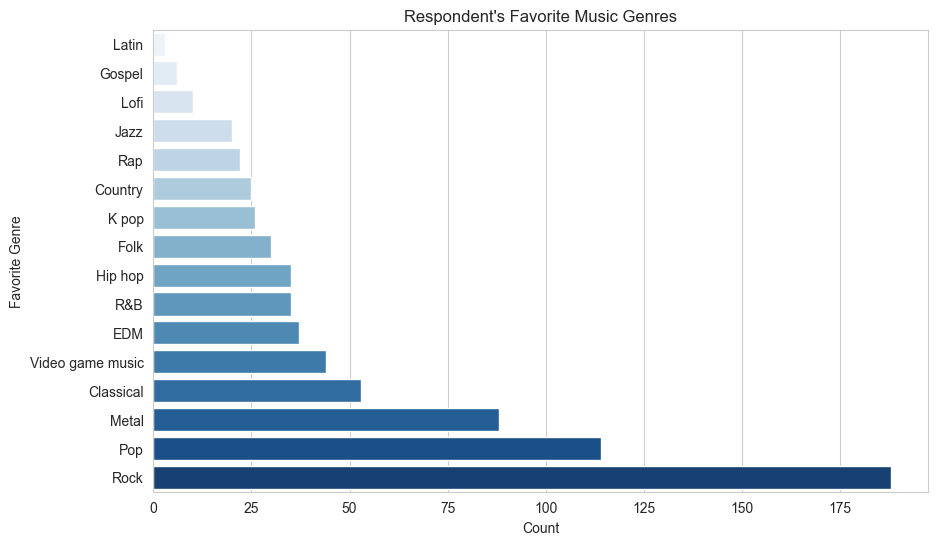

In [46]:
# Distribution of Favorite Genre

fav_genre_df = (data_raw.groupby("Fav genre")
                      .agg(count = ('Fav genre','count')).sort_values(by='count', ascending=True))
fav_genre_df.reset_index(inplace=True)

sns.set_style("whitegrid")
plt.figure(figsize=(10, 6))
sns.barplot(x=fav_genre_df['count'], y=fav_genre_df['Fav genre'], palette="Blues")
plt.xlabel('Count')
plt.ylabel('Favorite Genre')
plt.title('Respondent\'s Favorite Music Genres')
plt.show()

In [76]:
# Distribution of Musical Genre Frequency Listening
val_count_dict = {}

cols = ["Frequency [Classical]", "Frequency [Country]", "Frequency [EDM]", "Frequency [Folk]", 'Frequency [Gospel]', "Frequency [Hip hop]", "Frequency [Jazz]", "Frequency [K pop]", "Frequency [Latin]", "Frequency [Lofi]", "Frequency [Metal]", "Frequency [Pop]","Frequency [R&B]", "Frequency [Rap]",'Frequency [Rock]', 'Frequency [Video game music]']
col_label = ['Classical', 'Country', 'EDM', 'Folk', 'Gospel', 'Hip Hop', 'Jazz', 'K Pop', 'Latin', 'Lofi', 'Metal', 'Pop', 'R&B', 'Rap', 'Rock', 'Video Game Music']
value_order = ['Never', 'Rarely', 'Sometimes', 'Very frequently']

for val in cols:
    count = data_raw[val].value_counts()
    val_count_dict[val] = count

count_df = pd.concat(val_count_dict, axis=1)
count_df.columns = col_label
count_df = count_df.reindex(value_order)
final_count = count_df.transpose()

In [78]:
final_count

Never  Rarely  Sometimes  Very frequently
Classical           169     259        200              108
Country             343     233        111               49
EDM                 307     194        146               89
Folk                292     221        145               78
Gospel              535     135         52               14
Hip Hop             181     214        218              123
Jazz                261     247        175               53
K Pop               416     176         67               77
Latin               443     172         88               33
Lofi                280     211        160               85
Metal               264     192        134              146
Pop                  56     142        261              277
R&B                 225     211        184              116
Rap                 200     215        195              126
Rock                 91      96        219              330
Video Game Music    236     197        186              117

In [ ]:
# Graph Distribution of Mental Illness for Frequency Ranges

<Axes: title={'center': 'Pearson Correlation Matrix of Features'}>

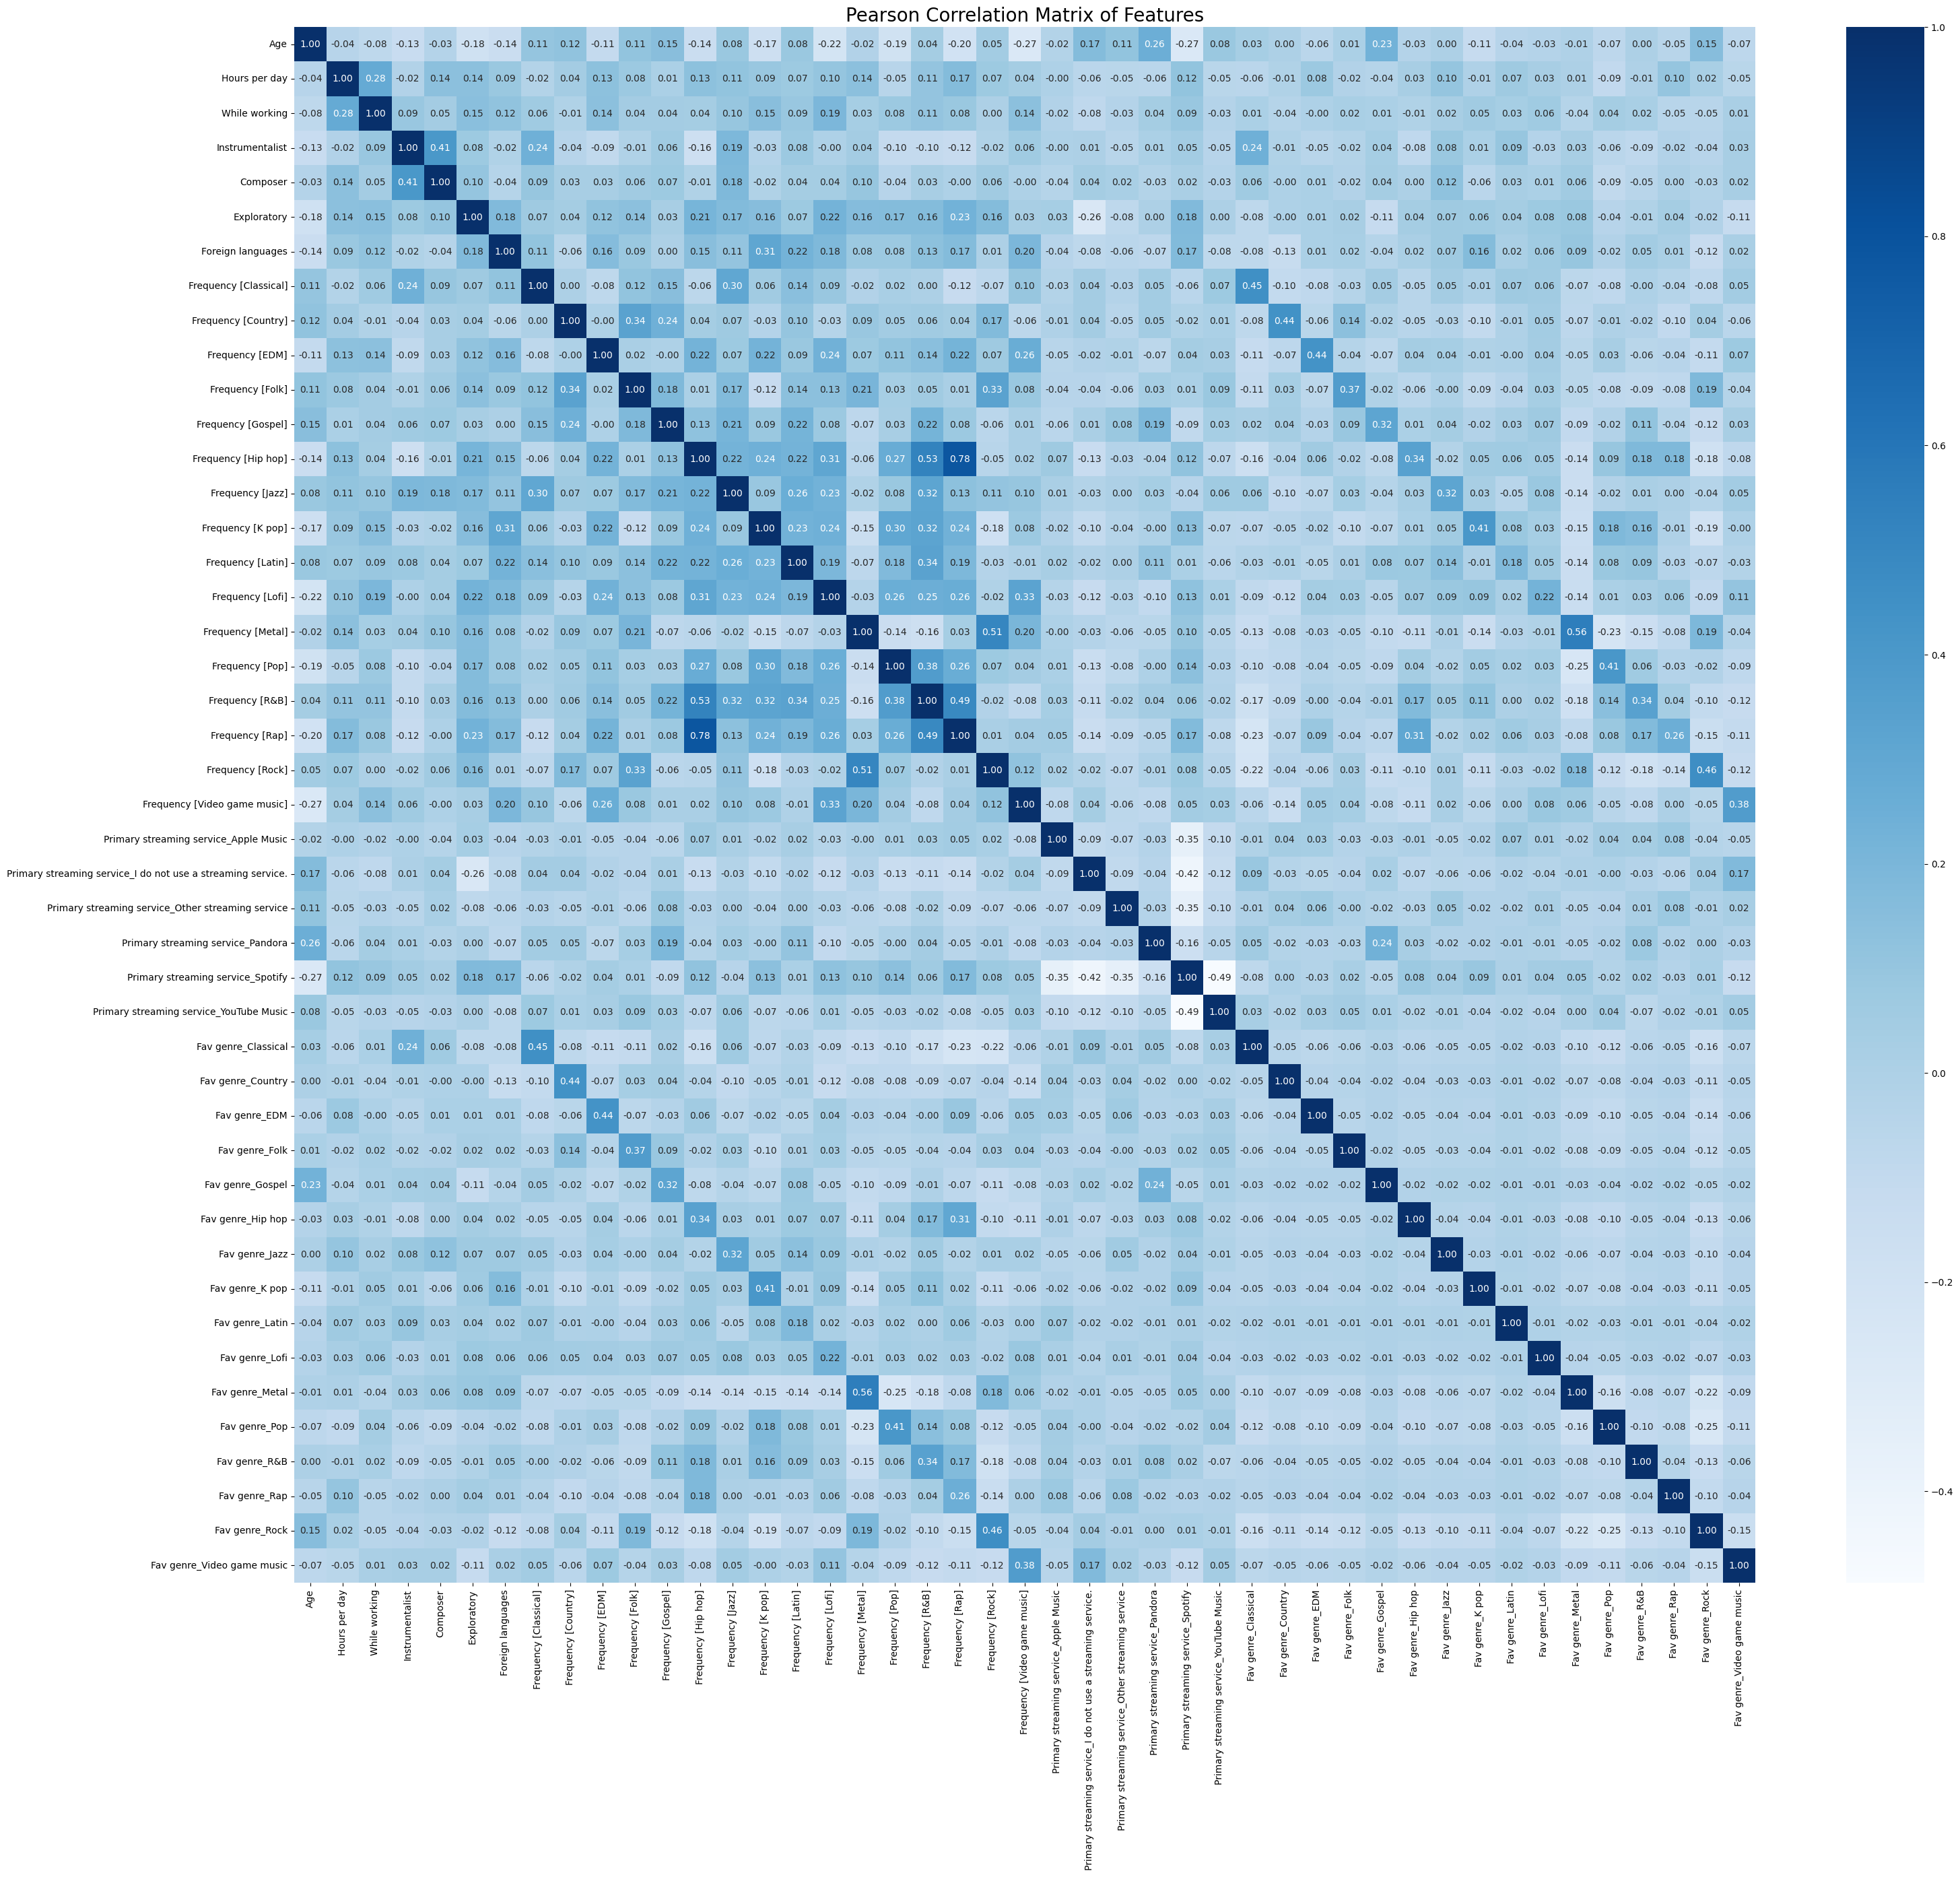

In [25]:
# Graph of Pearson Correlation Matrices - Features
plt.figure(figsize=(35,30)) # 35, 30
plt.title('Pearson Correlation Matrix of Features', fontsize=20)
sns.heatmap(feature_corr, annot=True, cmap=plt.cm.Blues, fmt='.2f')

In [ ]:
# Graph of Pearson Correlation Matrices - Labels

<Axes: title={'center': 'Pearson Correlation Matrix of Features vs Anxiety'}>

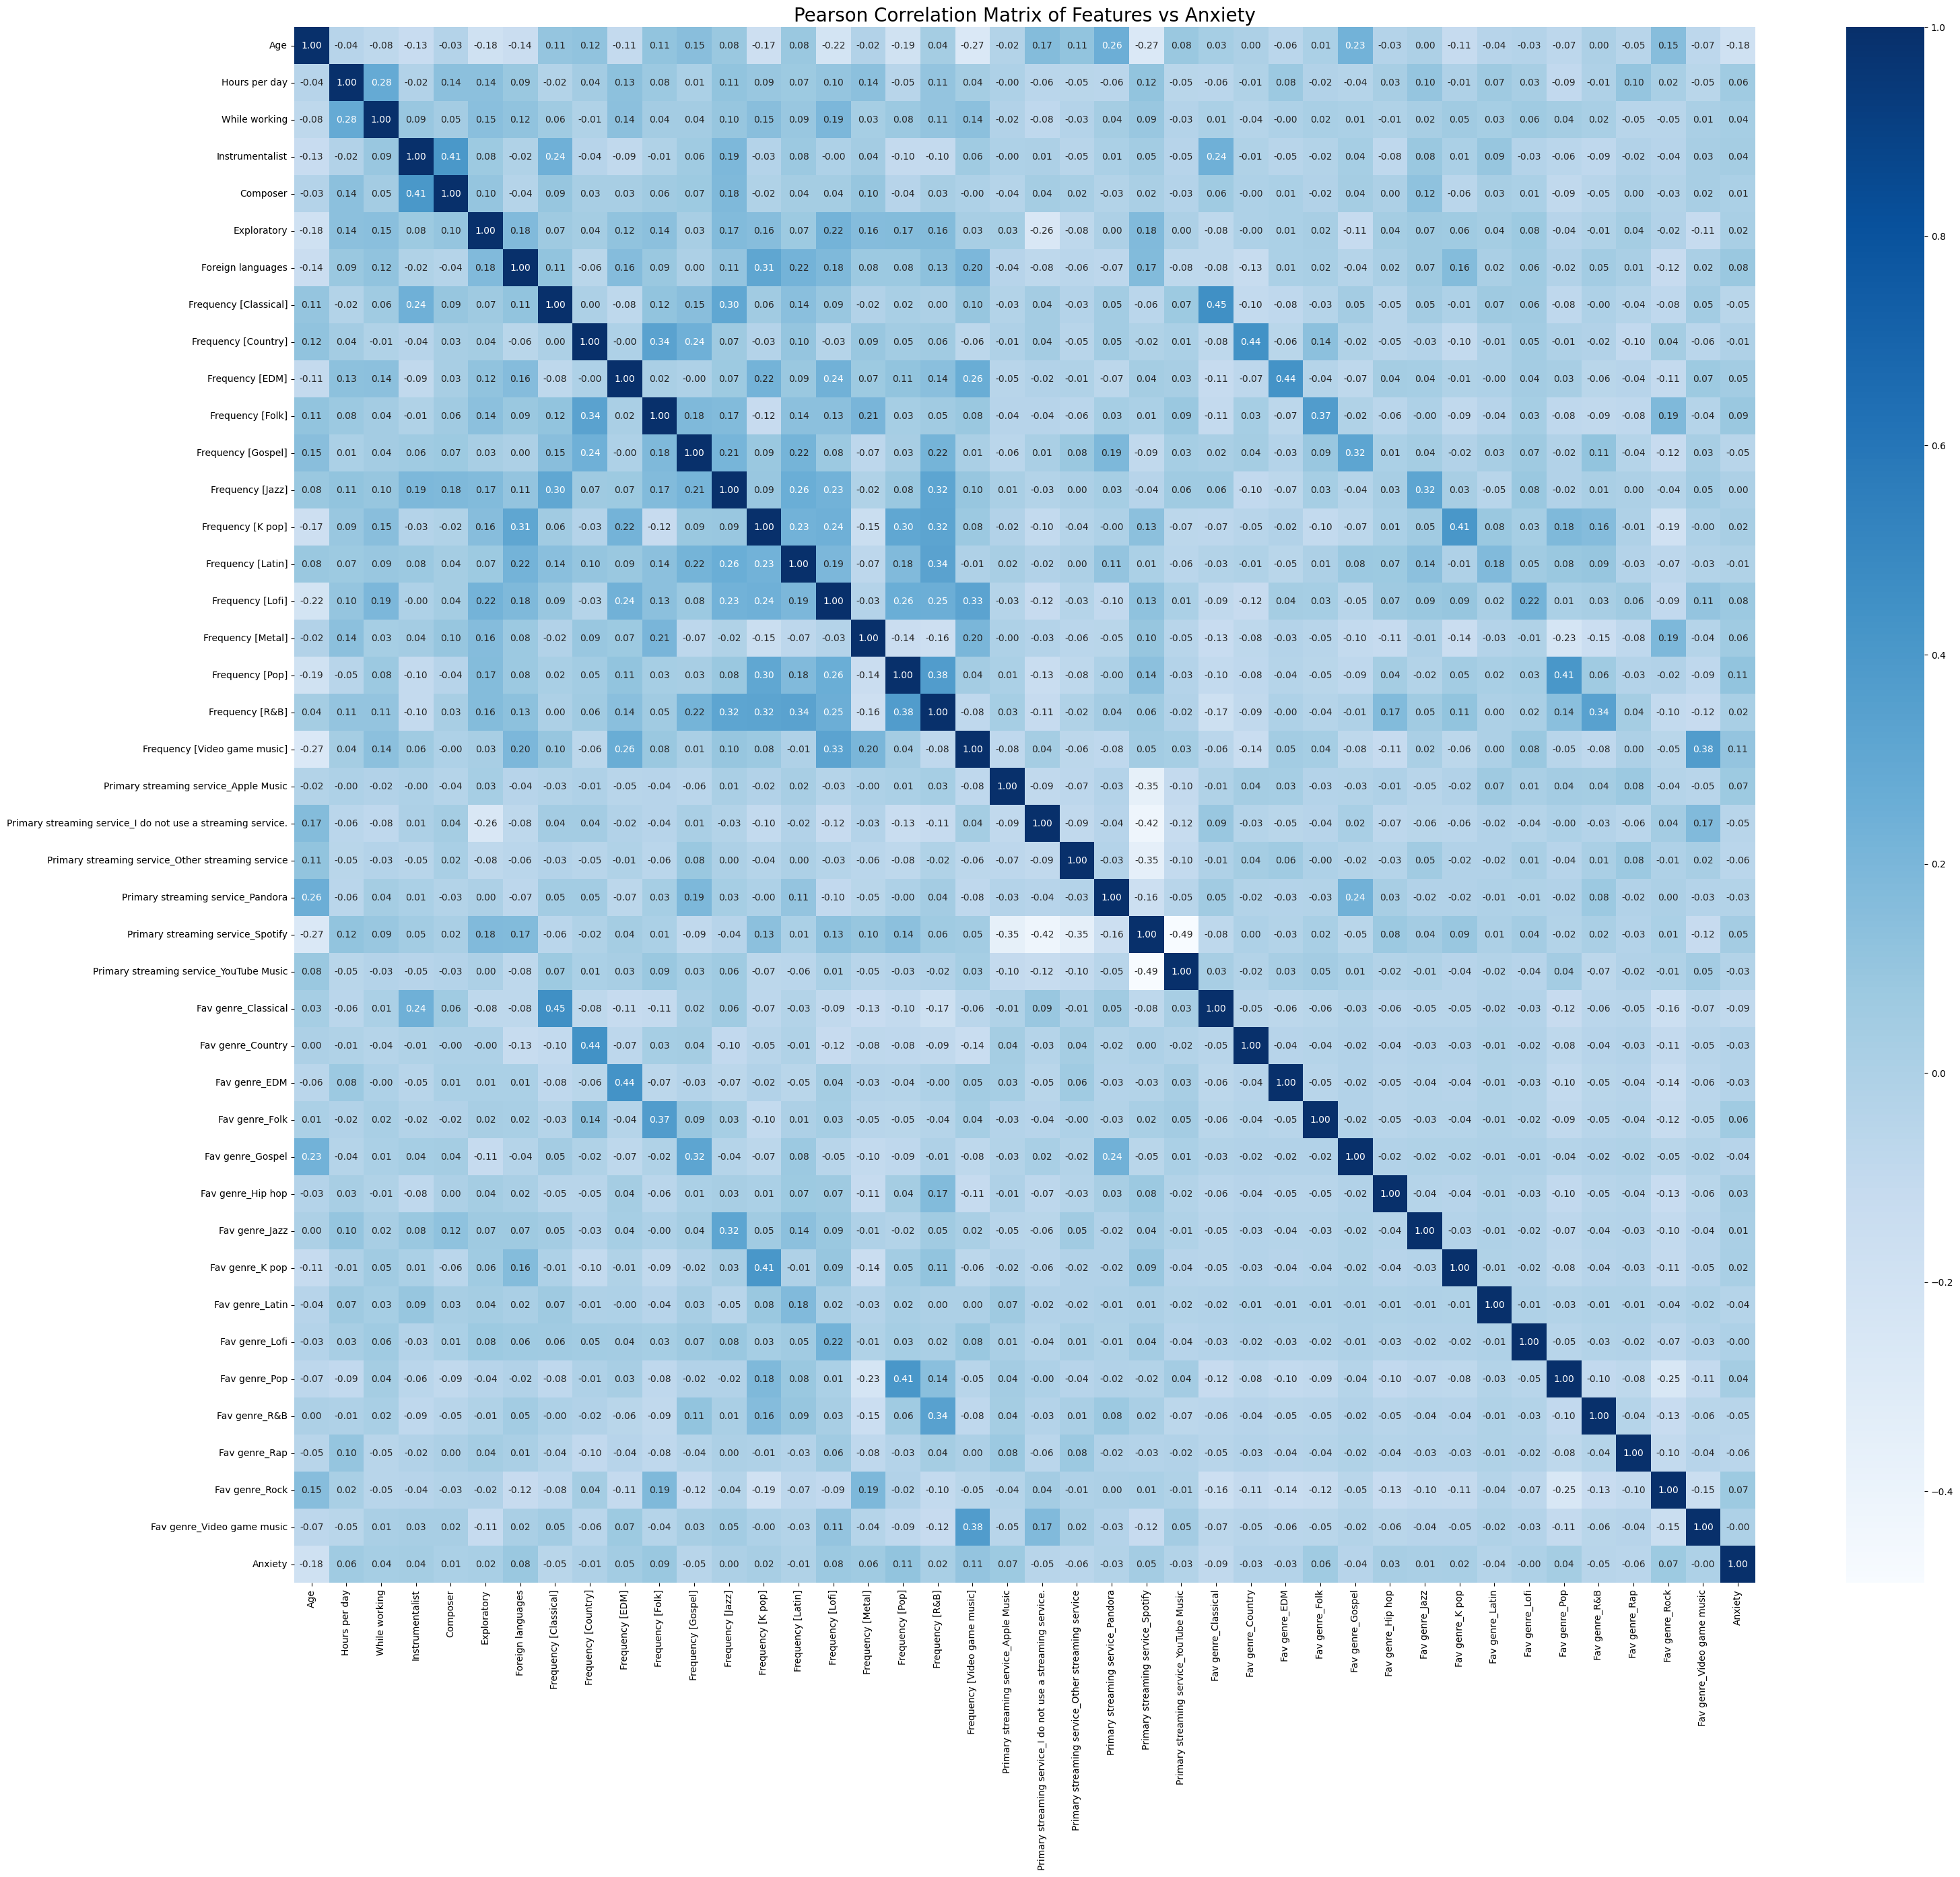

In [23]:
    # Anxiety
plt.figure(figsize=(35,30))
plt.title('Pearson Correlation Matrix of Features vs Anxiety', fontsize=20)
sns.heatmap(anxiety_corr, annot=True, cmap=plt.cm.Blues, fmt='.2f')

<Axes: title={'center': 'Pearson Correlation Matrix of Features vs Depression'}>

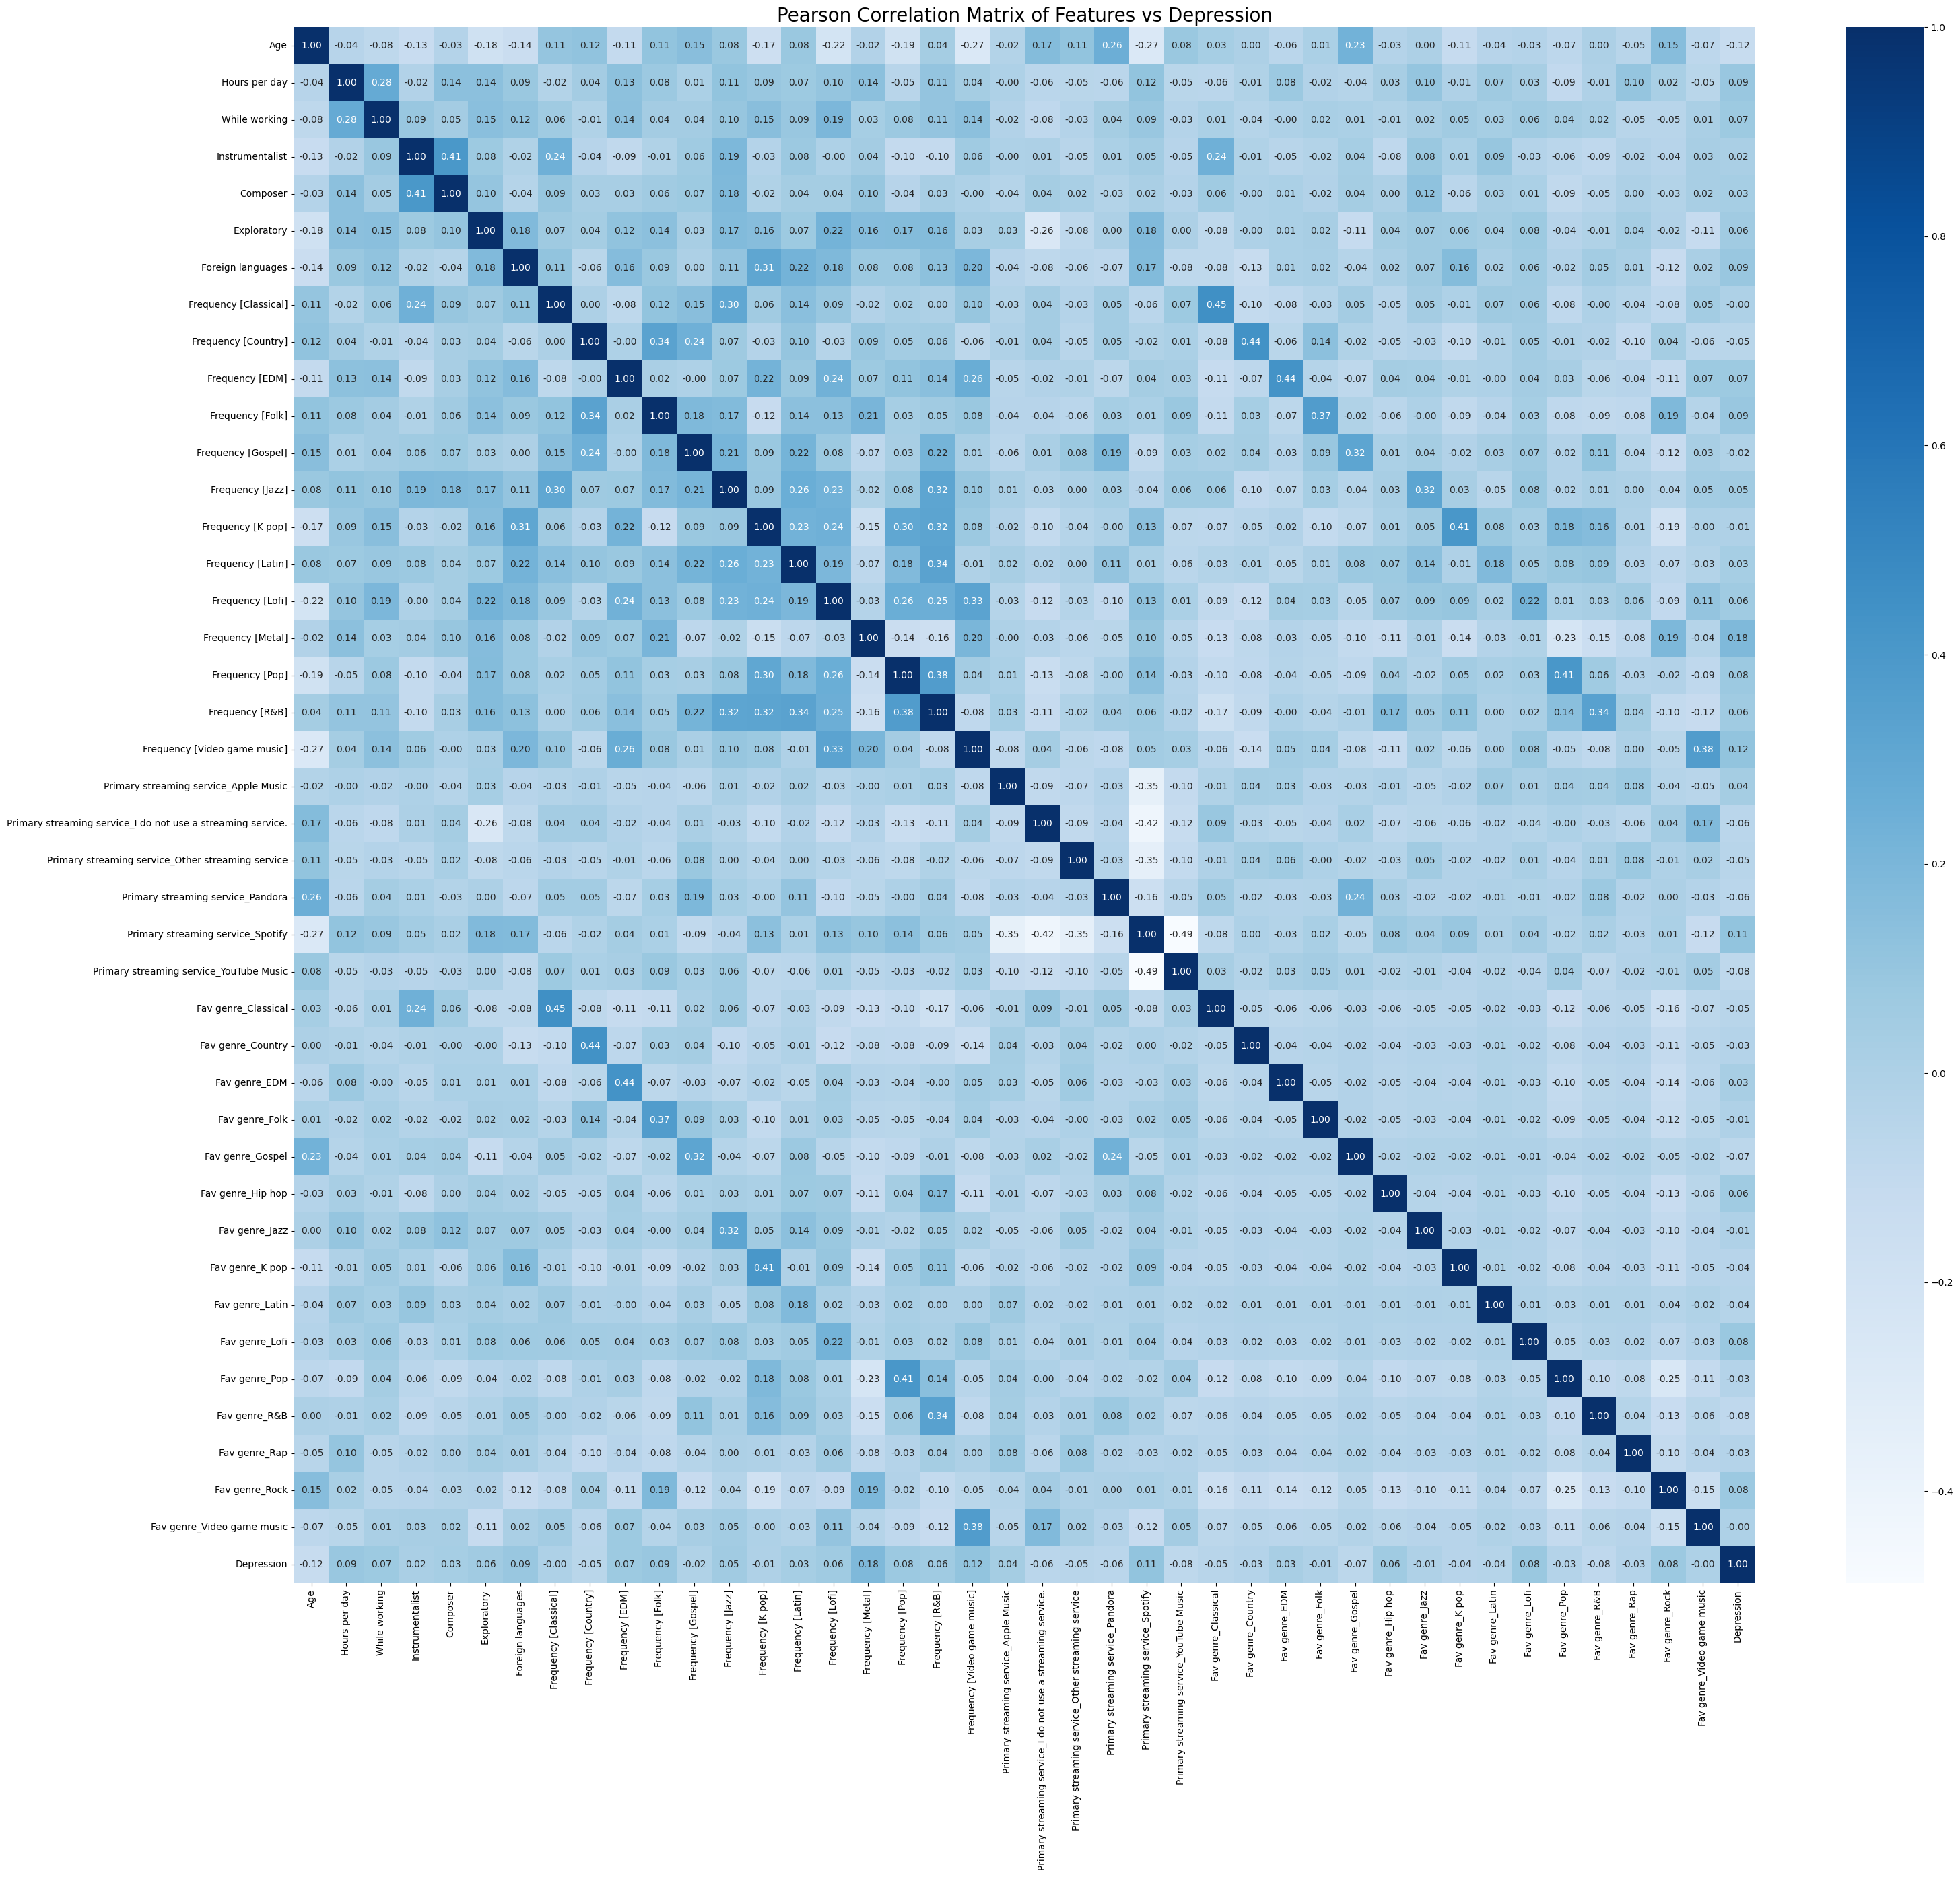

In [26]:
    # Depression
plt.figure(figsize=(35,30))
plt.title('Pearson Correlation Matrix of Features vs Depression', fontsize=20)
sns.heatmap(depression_corr, annot=True, cmap=plt.cm.Blues, fmt='.2f')

<Axes: title={'center': 'Pearson Correlation Matrix of Features vs OCD'}>

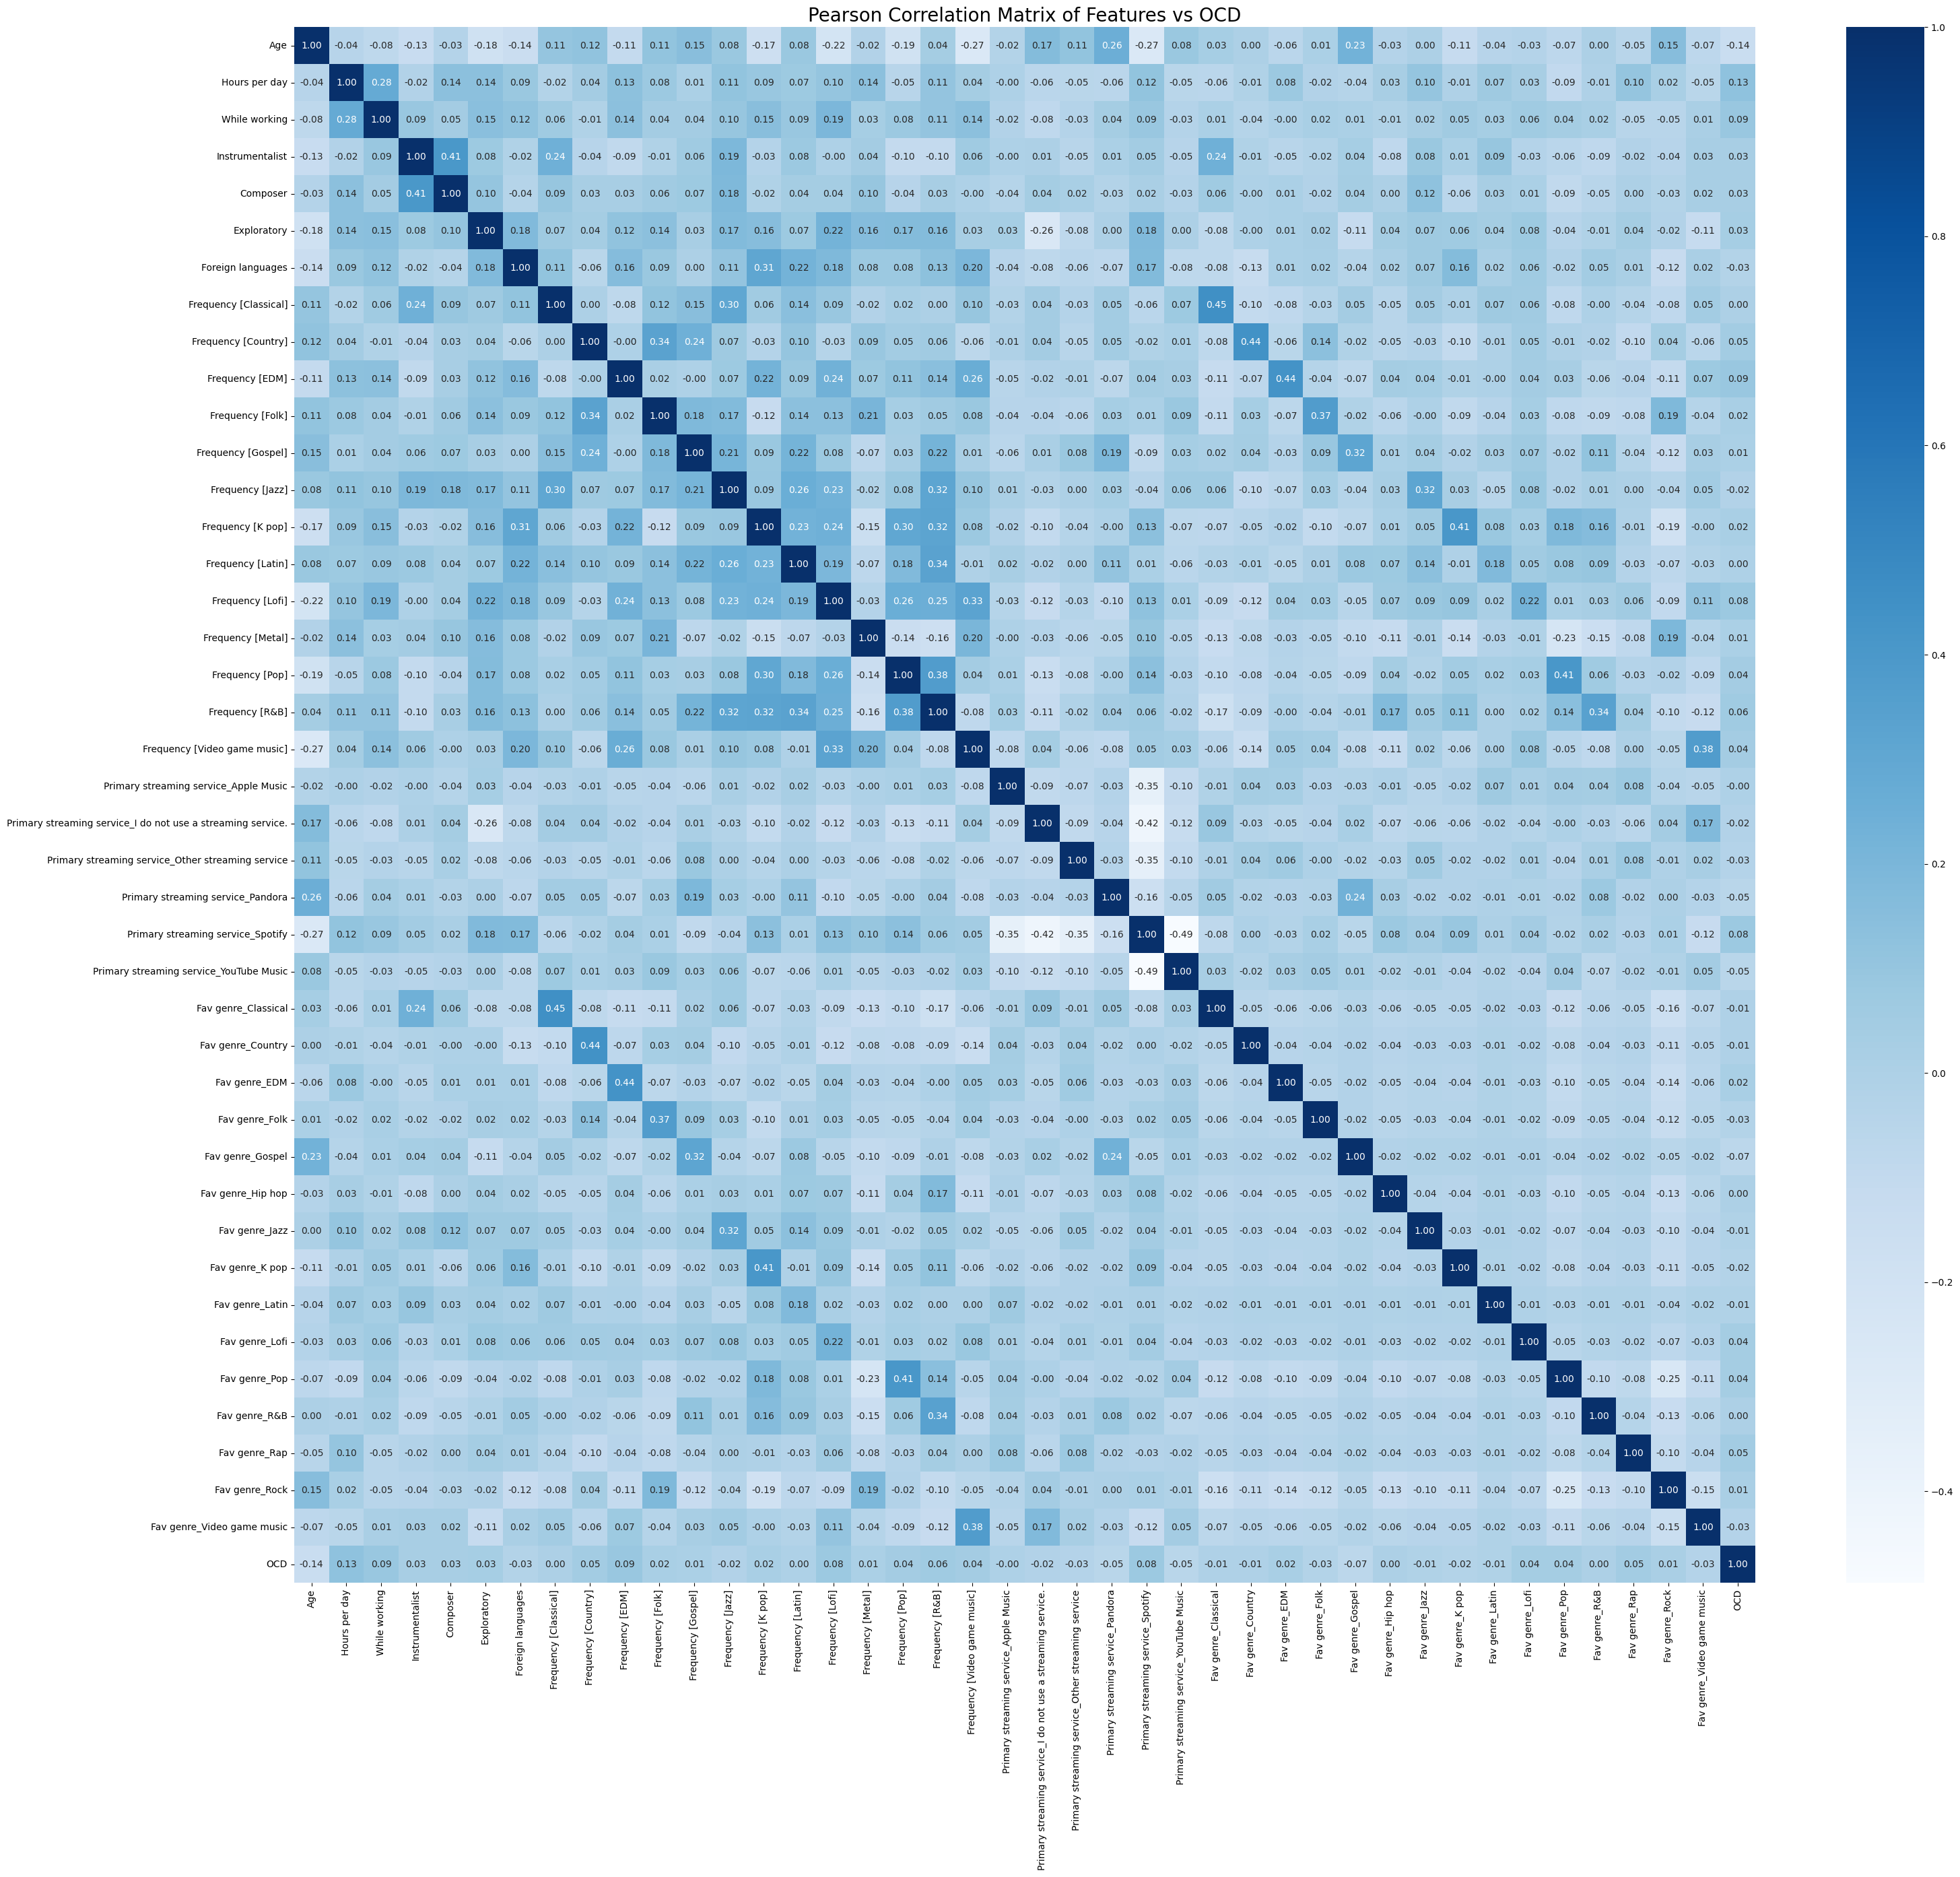

In [27]:
    # OCD
plt.figure(figsize=(35,30))
plt.title('Pearson Correlation Matrix of Features vs OCD', fontsize=20)
sns.heatmap(ocd_corr, annot=True, cmap=plt.cm.Blues, fmt='.2f')

<Axes: title={'center': 'Pearson Correlation Matrix of Features vs Insomnia'}>

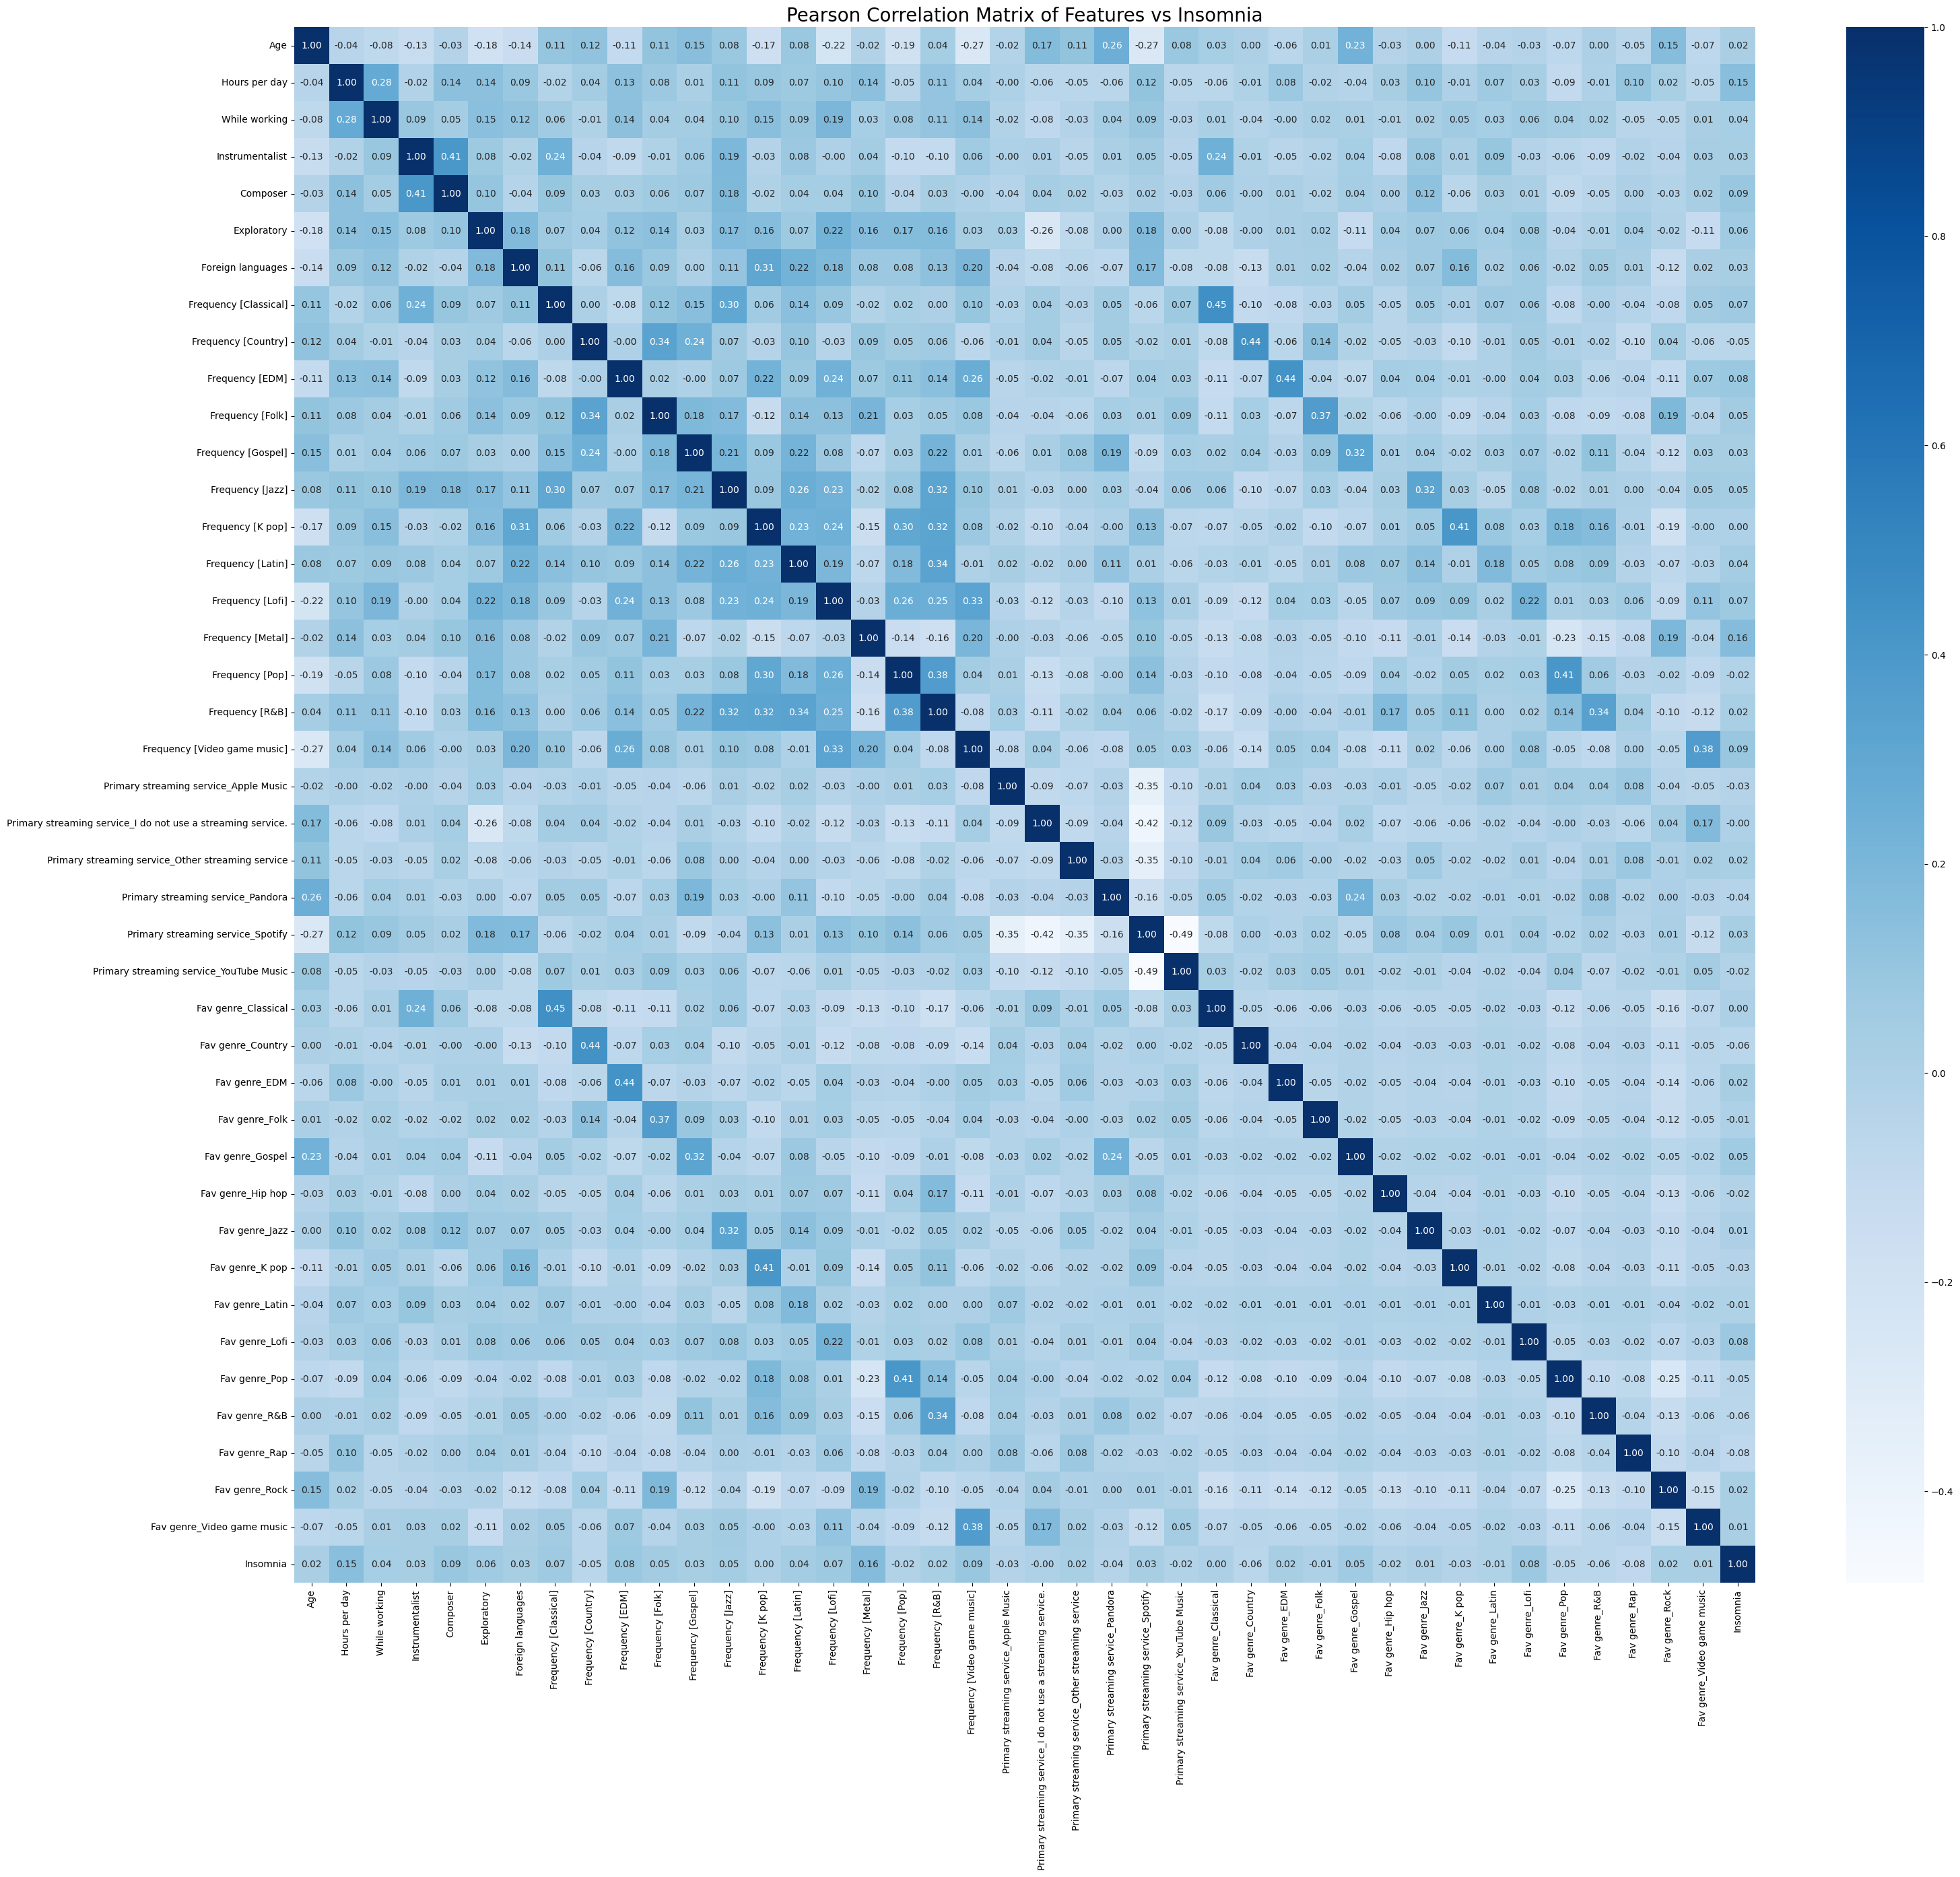

In [28]:
    # Insomnia
plt.figure(figsize=(35,30))
plt.title('Pearson Correlation Matrix of Features vs Insomnia', fontsize=20)
sns.heatmap(insomnia_corr, annot=True, cmap=plt.cm.Blues, fmt='.2f')